In [36]:
import pandas as pd
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df=pd.read_csv('household_water_usage_zar.csv')

In [38]:
df.head(20)

,Date and Time,Amount of Water Used (litres),Amount of Water Left (litres),Extra Costs Incurred (ZAR),Accumulated Amount of Water Used (litres),Total Extra Costs Incurred (ZAR)
0,2024-09-01 08:00:00,150.0,7350.0,0.0,150.0,0.0
1,2024-09-02 08:00:00,180.0,7170.0,0.0,330.0,0.0
2,2024-09-03 08:00:00,200.0,6970.0,0.0,530.0,0.0
3,2024-09-04 08:00:00,220.0,6750.0,0.0,750.0,0.0
4,2024-09-05 08:00:00,250.0,6500.0,0.0,1000.0,0.0
5,2024-09-06 08:00:00,300.0,6200.0,0.0,1300.0,0.0
6,2024-09-07 08:00:00,280.0,5920.0,0.0,1580.0,0.0
7,2024-09-08 08:00:00,300.0,5620.0,0.0,1880.0,0.0
8,2024-09-09 08:00:00,340.0,5280.0,0.0,2220.0,0.0
9,2024-09-10 08:00:00,360.0,4920.0,0.0,2580.0,0.0


In [39]:
print(df.columns)


Index(['Date and Time', 'Amount of Water Used (litres)',
       'Amount of Water Left (litres)', 'Extra Costs Incurred (ZAR)',
       'Accumulated Amount of Water Used (litres)',
       'Total Extra Costs Incurred (ZAR)'],
      dtype='object')


In [40]:
df.set_index('Date and Time', inplace=True)


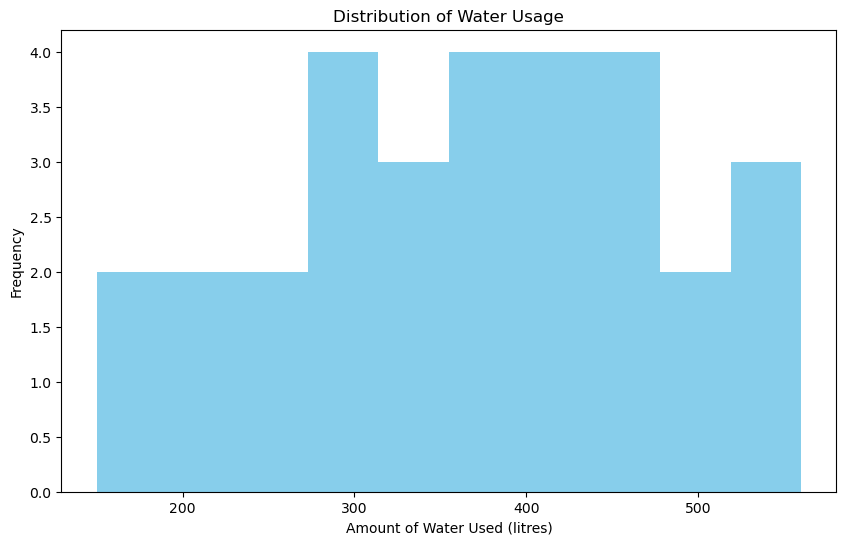

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(df['Amount of Water Used (litres)'], bins=10, color='skyblue')
plt.title('Distribution of Water Usage')
plt.xlabel('Amount of Water Used (litres)')
plt.ylabel('Frequency')
plt.show()


In [30]:
import matplotlib.dates as mdates

In [43]:
df.index = pd.to_datetime(df.index, errors='coerce')

print(type(df.index))


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


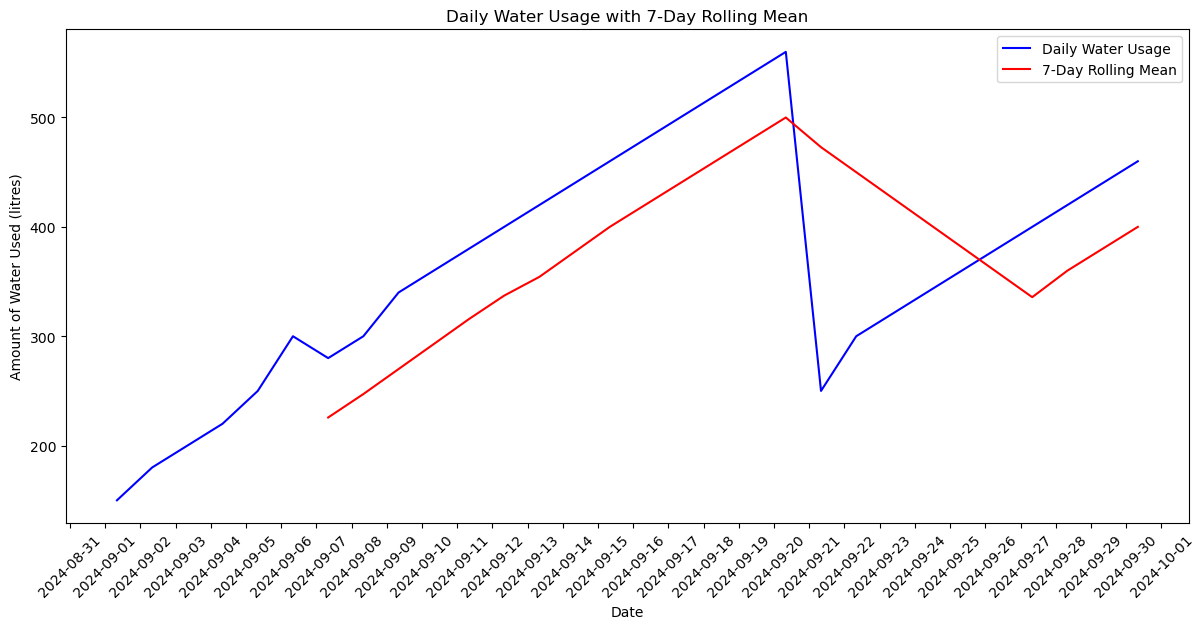

In [46]:
df.index = pd.to_datetime(df.index)

# Calculate 7-day rolling mean
rolling_mean = df['Amount of Water Used (litres)'].rolling(window=7).mean()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Amount of Water Used (litres)'], color='b', label='Daily Water Usage')
plt.plot(df.index, rolling_mean, color='r', label='7-Day Rolling Mean')

# Format x-axis to show only dates (without time)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

# Rotate date labels and adjust layout
plt.xticks(rotation=45)
plt.tight_layout()

plt.title('Daily Water Usage with 7-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Amount of Water Used (litres)')
plt.legend()

plt.show()

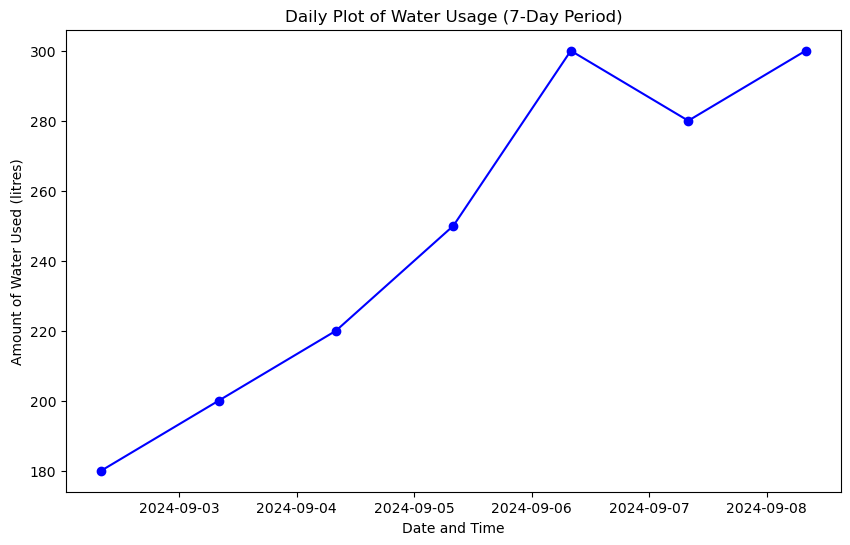

In [49]:
start_date = '2024-09-02'
end_date = '2024-09-08'

# Filter data for the specified 7-day period
filtered_df = df.loc[start_date:end_date]

# Plot the filtered data
plt.figure(figsize=(10, 6))
plt.plot(filtered_df.index, filtered_df['Amount of Water Used (litres)'], marker='o', color='b')
plt.title('Daily Plot of Water Usage (7-Day Period)')
plt.xlabel('Date and Time')
plt.ylabel('Amount of Water Used (litres)')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

plt.show()

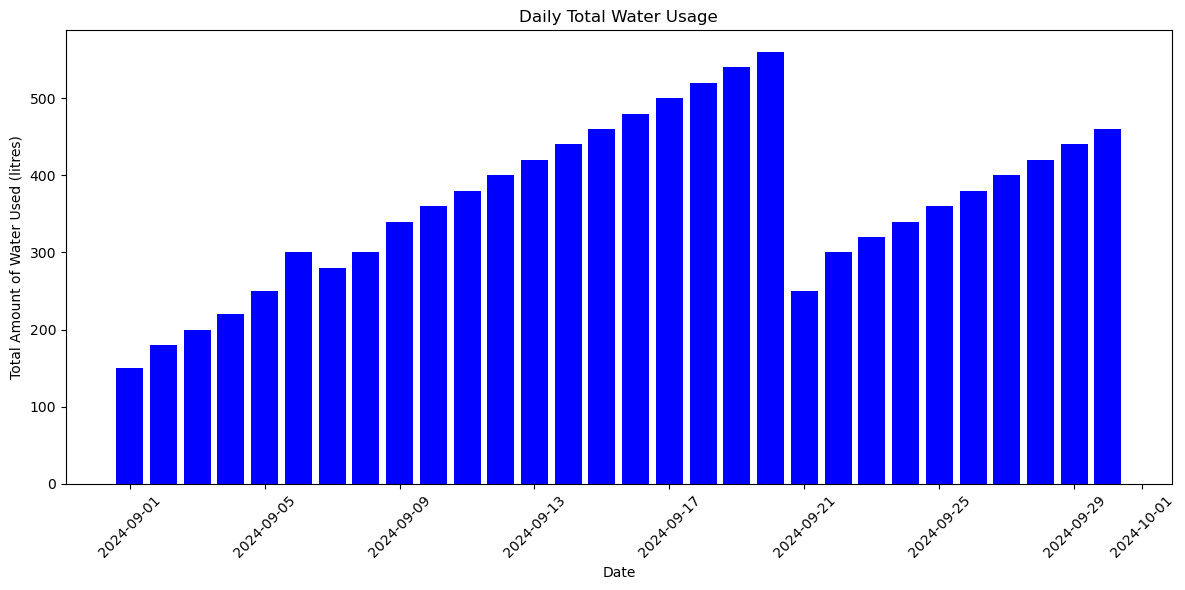

In [48]:
daily_sum = df.resample('D').sum()

plt.figure(figsize=(12, 6))
plt.bar(daily_sum.index, daily_sum['Amount of Water Used (litres)'], color='b')
plt.title('Daily Total Water Usage')
plt.xlabel('Date')
plt.ylabel('Total Amount of Water Used (litres)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [51]:
import numpy as np

In [52]:
date_range = pd.date_range(start='2024-09-01 00:00:00', end='2024-09-01 23:00:00', freq='H')
np.random.seed(0)  # For reproducibility
water_usage = np.random.randint(50, 150, size=len(date_range))

df = pd.DataFrame({
    'Date and Time': date_range,
    'Amount of Water Used (litres)': water_usage
})

df.set_index('Date and Time', inplace=True)

C:\Users\pales\AppData\Local\Temp\ipykernel_20144\4241710008.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start='2024-09-01 00:00:00', end='2024-09-01 23:00:00', freq='H')


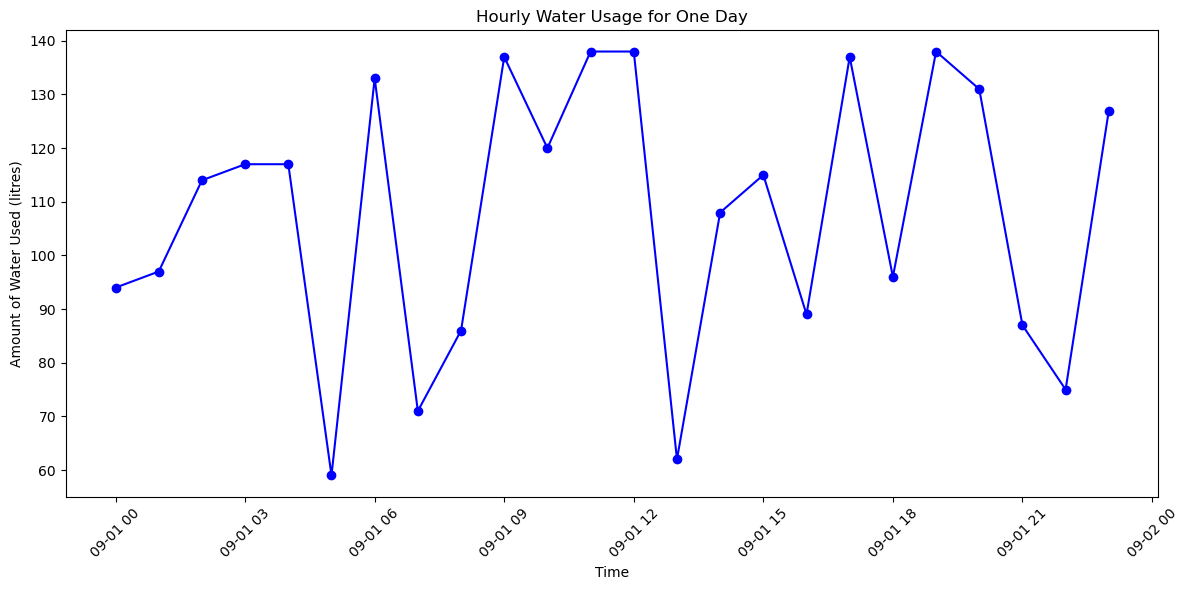

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Amount of Water Used (litres)'], marker='o', color='b', label='Hourly Water Usage')
plt.title('Hourly Water Usage for One Day')
plt.xlabel('Time')
plt.ylabel('Amount of Water Used (litres)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


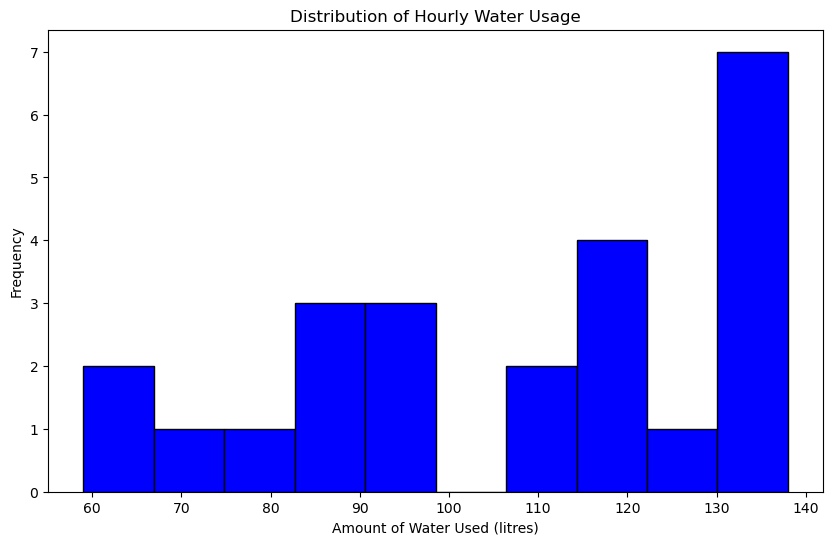

In [56]:
plt.figure(figsize=(10, 6))
plt.hist(df['Amount of Water Used (litres)'], bins=10, color='b', edgecolor='black')
plt.title('Distribution of Hourly Water Usage')
plt.xlabel('Amount of Water Used (litres)')
plt.ylabel('Frequency')
plt.show()


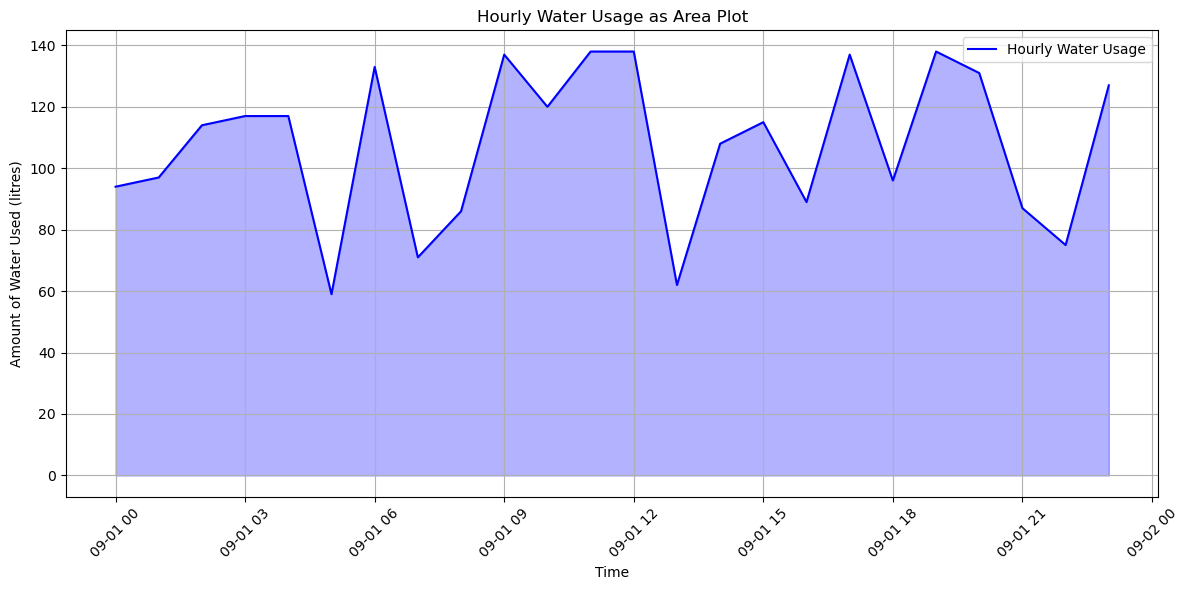

In [58]:
plt.figure(figsize=(12, 6))
plt.fill_between(df.index, df['Amount of Water Used (litres)'], color='b', alpha=0.3)
plt.plot(df.index, df['Amount of Water Used (litres)'], color='b', label='Hourly Water Usage')
plt.title('Hourly Water Usage as Area Plot')
plt.xlabel('Time')
plt.ylabel('Amount of Water Used (litres)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\pales\AppData\Local\Temp\ipykernel_20144\3310581735.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_totals = df.resample('H').sum()


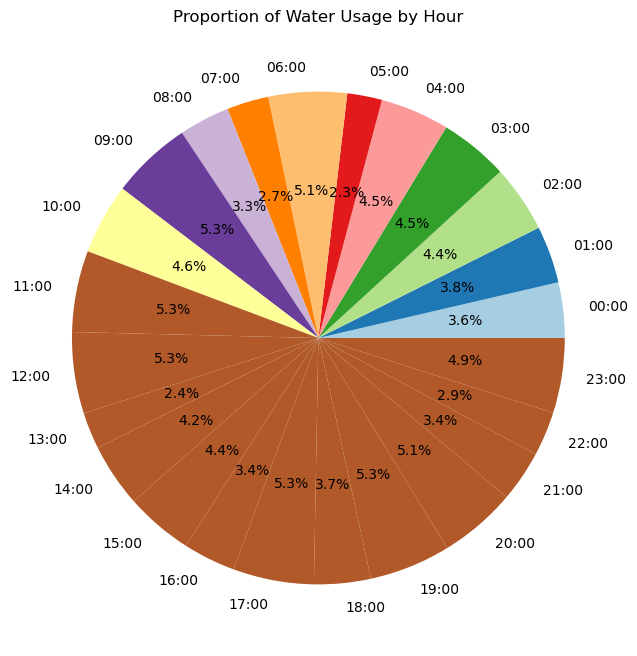

In [59]:
hourly_totals = df.resample('H').sum()
plt.figure(figsize=(10, 8))
plt.pie(hourly_totals['Amount of Water Used (litres)'], labels=hourly_totals.index.strftime('%H:%M'), autopct='%1.1f%%', colors=plt.cm.Paired(range(len(hourly_totals))))
plt.title('Proportion of Water Usage by Hour')
plt.show()


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate sample data for 7 days
date_range = pd.date_range(start='2024-09-01 00:00:00', end='2024-09-07 23:00:00', freq='H')
np.random.seed(0)  # For reproducibility
water_usage = np.random.randint(50, 150, size=len(date_range))

df = pd.DataFrame({
    'Date and Time': date_range,
    'Amount of Water Used (litres)': water_usage
})

df.set_index('Date and Time', inplace=True)

# Decompose the time series
result = seasonal_decompose(df['Amount of Water Used (litres)'], model='additive', period=24)  # Daily seasonality

# Plot the decomposition
plt.figure(figsize=(14, 10))
plt.subplot(4, 1, 1)
plt.plot(df.index, df['Amount of Water Used (litres)'])
plt.title('Original Series')

plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title('Residual Component')

plt.tight_layout()
plt.show()


C:\Users\pales\AppData\Local\Temp\ipykernel_20144\846575168.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start='2024-09-01 00:00:00', end='2024-09-01 23:00:00', freq='H')


ValueError: x must have 2 complete cycles requires 48 observations. x only has 24 observation(s)

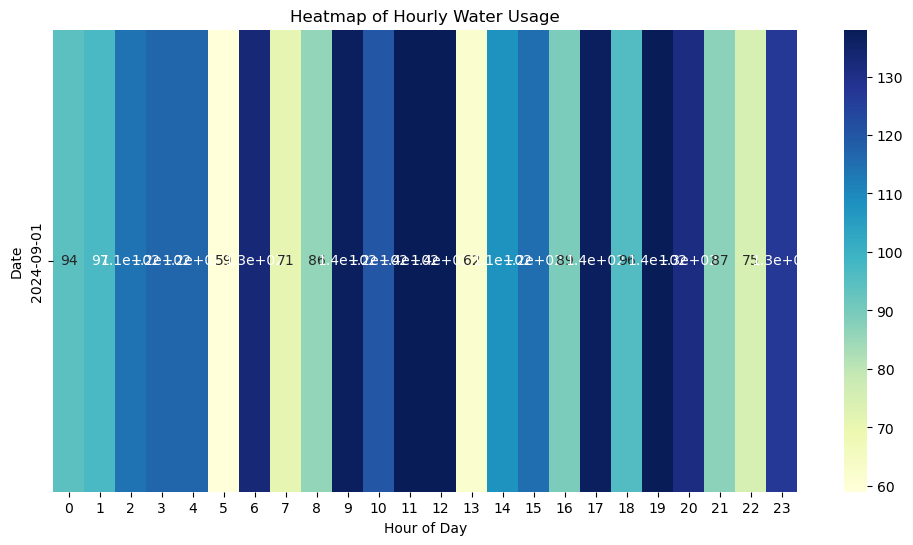

In [64]:
import seaborn as sns

# Create a column for hours
df['Hour'] = df.index.hour

# Pivot for heatmap
heatmap_data = df.pivot_table(index=df.index.date, columns='Hour', values='Amount of Water Used (litres)', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, cbar=True)
plt.title('Heatmap of Hourly Water Usage')
plt.xlabel('Hour of Day')
plt.ylabel('Date')
plt.show()
